#GROUP 17

Raihan Faisal Yusuf - 11124138

Muhammad Aufa Rafiqi - 10124812

Muhammad Rafi Al Rantisi - 10124933

Nabila Nasywa Annisa - 11124013

Najwan Nasuhan Hamdan - 11124031

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [17]:
# Data Understanding

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path = '/content/drive/MyDrive/Colab Notebooks/IEA-EV-dataEV salesHistoricalCars.csv'
df = pd.read_csv(file_path)
data = pd.read_csv(file_path)
print(data.head())

print("Info Data:")
print(data.info())

print("\n5 Data Teratas:")
print(data.head())

print("\nStatistik Deskriptif:")
print(data.describe())



      region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
1  Australia  Historical  EV stock share  Cars         EV  2011   percent   
2  Australia  Historical  EV sales share  Cars         EV  2011   percent   
3  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
4  Australia  Historical        EV stock  Cars        BEV  2012  Vehicles   

       value  
0   49.00000  
1    0.00039  
2    0.00650  
3   49.00000  
4  220.00000  
Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      3798 non-null   object 
 1   category    3798 non-null   object 
 2   parameter   3798 non-null   object 
 3   mode        3798 non-null   object 
 4   powertrain  3798 non-null   object 
 5   year        3798 non-null   int64  
 6

In [18]:
# Data Cleaning

print("\nCek nilai yang hilang:")
print(data.isnull().sum())

# Isi nilai hilang dengan mean kolom (jika ada)
data.fillna(data.mean(numeric_only=True), inplace=True)

# Hapus outlier berdasarkan IQR untuk kolom numerik
Q1 = data.select_dtypes(include=np.number).quantile(0.25)
Q3 = data.select_dtypes(include=np.number).quantile(0.75)
IQR = Q3 - Q1

data_clean = data[~((data.select_dtypes(include=np.number) < (Q1 - 1.5 * IQR)) |
                    (data.select_dtypes(include=np.number) > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Data shape sebelum cleaning: {data.shape}")
print(f"Data shape setelah cleaning: {data_clean.shape}")



Cek nilai yang hilang:
region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64
Data shape sebelum cleaning: (3798, 8)
Data shape setelah cleaning: (3099, 8)


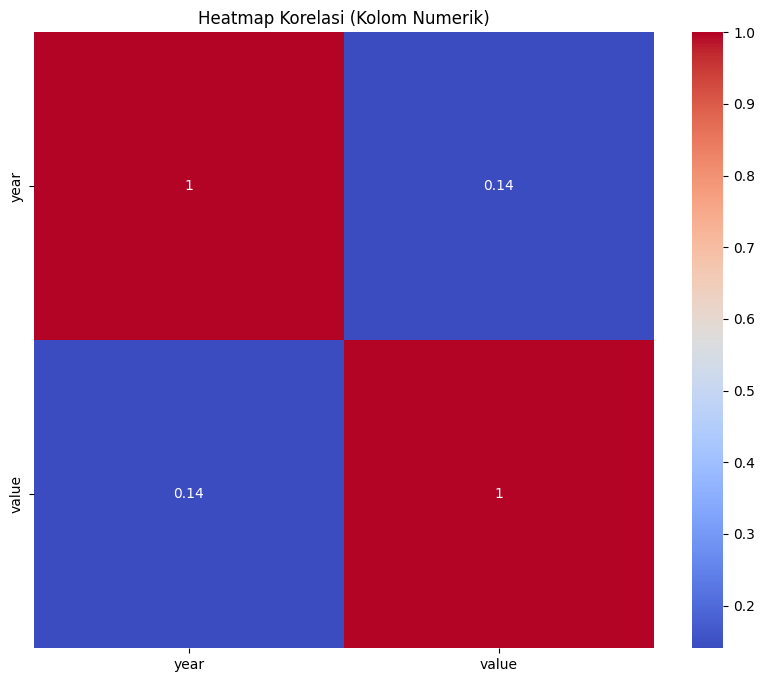

In [20]:
# Karena ada kolom non-numerik (misal 'Australia'), kita harus ambil kolom numerik dulu untuk korelasi
numeric_data = data_clean.select_dtypes(include=[np.number])

# Visualisasi distribusi kolom numerik 'sales' (ganti jika kolom target berbeda)
if 'sales' in numeric_data.columns:
    sns.histplot(numeric_data['sales'], kde=True)
    plt.title('Distribusi Sales')
    plt.show()

# Heatmap korelasi hanya antar kolom numerik
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi (Kolom Numerik)')
plt.show()

# Jika ingin visualisasi kolom kategori, contohnya kolom 'Country' (ganti sesuai data)
if 'Country' in data_clean.columns:
    plt.figure(figsize=(12,6))
    sns.countplot(data=data_clean, x='Country', order=data_clean['Country'].value_counts().index)
    plt.xticks(rotation=45)
    plt.title('Distribusi Data per Country')
    plt.show()


In [21]:
# Pilih target kolom
target_col = 'sales' if 'sales' in data_clean.columns else data_clean.columns[-1]

# Pisahkan fitur dan target
X = data_clean.drop(columns=[target_col])
y = data_clean[target_col]

# Encode fitur kategorikal jika ada
X = pd.get_dummies(X, drop_first=True)

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Pilih target kolom
target_col = 'sales' if 'sales' in data_clean.columns else data_clean.columns[-1]

# Pisahkan fitur dan target
X = data_clean.drop(columns=[target_col])
y = data_clean[target_col]

# Encode fitur kategorikal jika ada
X = pd.get_dummies(X, drop_first=True)

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Mean Squared Error: 7091880.5174
R2 Score: 0.3370


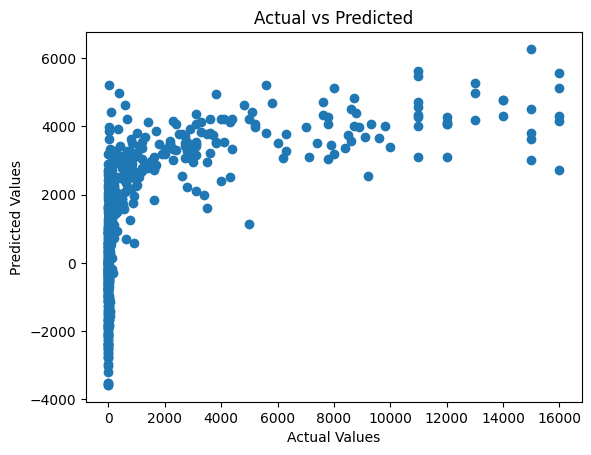


Interpretasi:
- MSE mendekati 0 berarti model memiliki kesalahan prediksi yang kecil.
- R2 mendekati 1 berarti model mampu menjelaskan variabilitas data dengan baik.
- Scatter plot mendekati garis diagonal menunjukkan prediksi yang baik.



In [24]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

print("""
Interpretasi:
- MSE mendekati 0 berarti model memiliki kesalahan prediksi yang kecil.
- R2 mendekati 1 berarti model mampu menjelaskan variabilitas data dengan baik.
- Scatter plot mendekati garis diagonal menunjukkan prediksi yang baik.
""")


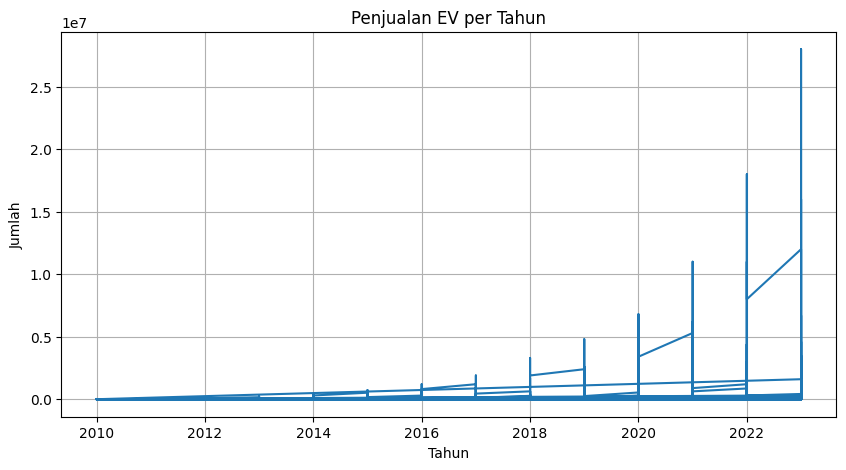

In [25]:
import matplotlib.pyplot as plt

# Pakai nama kolom yang sesuai dengan df.columns kamu
plt.figure(figsize=(10,5))
plt.plot(df['year'], df['value'])  # lowercase semua
plt.title('Penjualan EV per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.grid(True)
plt.show()